# Seaborn library

- Matplotlibを改善しておいた形である。
- Matplotlibをベースに様々なカラーテーマや統計用チャートなどの機能を追加した視覚化パッケージである。
- 基本的な視覚化機能はMatplotlibパッケージに依存し、統計機能はStatsmodelsパッケージに依存する。
- より簡単な操作で多様なカラーテーマおよびチャートを使用する。

- sns.lineplot() : 時間変化による値の変化および流れを視覚化
    - sns.lineplot(x, y, data)
        - x : 使用するxのデータ
        - y : 使用する yのデータ
        - data: 使用する全データ(dataの値伝達時にx、y値にはキーワードの文字列を伝達)
- sns.distplot() : histogramおよびkernelの密度の推定値(確率の密度の関数の一種)を一度に視覚化
    - sns.distplot(x, hist, kde)
        - x: 使用するデータ
        - hist:histogram設定可否、デフォルト値 = True
        - kde:確率の密度の関数設定の有無、デフォルト値 = True
- sns.boxplot() : 各属性ごとにbox-plot視覚化
    -sns.boxplot(x, y, data, by)
        - x: 使用するx軸データ
        - y:使用するy軸データ
        - data: 使用する全データ(dataの値伝達時にx, y の値にはキーワードの文字列伝達)
        - by: group_by基準
- sns.countplot() : 各カテゴリごとにデータ個数を視覚化
    -sns.countplot(x, data)
        - x:カテゴリとして使われるDataFrameの列の名前
        - data: 使用する DataFrame
        - sns.barplot() : カテゴリごとに数値を視覚化,値に対する比較が容易
- sns.barplot(x, y, data)
    - x : 使用するxのデータ
    - y : 使用する yのデータ
    - data: 使用する全データ(dataの値を配信時にx、y印字値ではキーワードの文字列配信)
- sns.pairplot() : DataFrameを引数で受け列の組み合わせに対してScatter Plotを描き、対角線領域には該当データのhistogram視覚化
    - ssnspairplot(data)
- sns.heatmap():カテゴリの値で構成された2次元データに対する視覚化
    - sns.heatmap(data, annot, fmt)
        - data: 使用するデータフレーム
        - annot:値を表記するかどうか
        - fmt: 値の表記形式

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### データ処理関連Pandas function

- Series.map(func): Seriesオブジェクトに対してユーザ定義関数適用
- Series/DataFrame.apply(func) : Series/DataFrameオブジェクトに対してユーザ定義関数適用

In [2]:
# map with dict()
s1 = pd.Series(['apple', 'banana', 'apple', 'orange', 'kiwi'])
s1

0     apple
1    banana
2     apple
3    orange
4      kiwi
dtype: object

In [3]:
set(s1.values)

{'apple', 'banana', 'kiwi', 'orange'}

In [4]:
# mapping情報を盛っているdictionary生成
dict_map = {'apple':0, 'banana':1, 'kiwi':2, 'orange':3}
dict_map

{'apple': 0, 'banana': 1, 'kiwi': 2, 'orange': 3}

In [6]:
#.map(交換基準)はdictionary資料を入れてくれればkeyの値にマッチングされたvalueに交換
s1_2 = s1.map(dict_map)
s1_2

0    0
1    1
2    0
3    3
4    2
dtype: int64

In [7]:
s1.map(lambda x:len(x))

0    5
1    6
2    5
3    6
4    4
dtype: int64

In [9]:
# apply 活用
s2 = pd.Series([1, 2, 3, 4, 5])
s2.apply(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

In [9]:
#4 x 2の構造ですべての値が1人DataFrameを生成
d1 = pd.DataFrame(np.ones((4, 2)))
d1

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


In [10]:
# 内蔵関数の適用
d1.sum() 

0    4.0
1    4.0
dtype: float64

In [11]:
# applyは内部要素について関数を用いた演算を進める. Columnの値を全部合わせる.
d1.apply(sum)

0    4.0
1    4.0
dtype: float64

In [12]:
# axis=0(基本)=>行の基準で関数を遂行=>列の基準に結果
d1.apply(sum, axis=0) # Columnごとに合わせる.

0    4.0
1    4.0
dtype: float64

In [13]:
# axis=1=>のような列にある資料だけで合計する.
d1.apply(sum, axis=1) # rowごとに合わせる.

0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64

In [14]:
data = {'height':[10, 20, 30],
       'width':[3, 4, 5]}
df = pd.DataFrame(data)
df

,height,width
0,10,3
1,20,4
2,30,5


In [15]:
# 四角形の面積を求めるユーザー関数定義
# 面積 = 横 * 縦
def area(row):
    return row['height'] * row['width'] 

In [16]:
# apply関数でaxis=1日、ユーザ定義関数が接近する対象 : すべてのColumn
df.apply(area, axis=1)

0     30
1     80
2    150
dtype: int64

In [19]:
# 関数の適用結果を新しいColumnとして保存する.
# 'araa' という Column を作ってそこに関数の結果物を保存
df['area'] = df.apply(area, axis=1)
df

,height,width,area
0,10,3,30
1,20,4,80
2,30,5,150


### データ変換

In [1]:
# 配列タイプのデータをDataFrameに変換して最終データとして生成する。
from sklearn.datasets import load_iris # 配列タイプのデータ。
# sns.load_iris() : 完成したdf 形態のデータ。
# 1. iris=load_iris()
# 2. data、target値を分離して変数に割り当ててtargetは2次元データに生成(150行き1列)
# 3. numpy関数を利用してdata、targetを熱の方向に統合する。
# 4. 3度データを利用し、dataframe生成、Columnの名前も同時に生成する。
# 5. 品種(species)は文字のタイプに最終変換(0=setosa、1=versicolor、2=virginica)
# 5番でmap、apply関数の使用
# 6. Column名変更:(cm)除去、空白を除去

In [21]:
iris = load_iris()

In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
x = iris['data']
y = iris['target']

In [26]:
type(x)
x.shape

(150, 4)

In [31]:
type(y)
y.shape

(150, 1)

In [33]:
# yがDataFrameで一つのColumnとして使われる値
# xとColiumnの方向で(横の長さ1増)結合
# 1次元->2次元(150、1)
y = y.reshape(150, 1)
y.shape

(150, 1)

In [29]:
# xにyをつける => np.hstack
data = np.hstack((x, y))
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [34]:
data.shape

(150, 5)

In [35]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [38]:
iris.keys()
cols = iris['feature_names'] + ['species']
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [42]:
df.columns = cols
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [43]:
species_map = {0.0:'setosa', 1.0:'versicolor', 2.0:'virginica'}
species_map

{0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'}

In [44]:
df['species'] = df['species'].map(species_map)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [45]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [46]:
for col in df.columns:
    new_col = col.replace(' (cm)', '')
    new_col = new_col.replace(' ', '_')
    df.rename({col:new_col}, axis=1, inplace=True)

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### データの探索

In [48]:
# 数値型の変数の技術統計値の確認
# df.describe() : 基本動作 => 数値型の変数に対する結果のみ返却
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
# 数値データではないColumnに対する記述統計値の確認 : describe(include=['object'])
df.describe(include=['object'])

,species
count,150
unique,3
top,setosa
freq,50


In [49]:
# すべての変数の記述統計値確認: .describe(include = 'all')
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [52]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
# サンプルのデータで使用するデータを抽出
# 品種のColumnを除いたすべてのColumnについて1行のデータだけを抽出
sample = df.drop('species', axis=1)[:1].values.reshape(4,)

In [55]:
sample

array([5.1, 3.5, 1.4, 0.2])

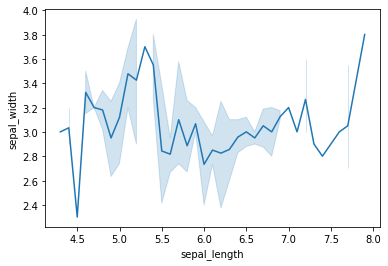

In [56]:
# line plot
# sns.lineplot(x=[1, 2, 3, 4], y=sample)
sns.lineplot(x='sepal_length', y='sepal_width', data=df)

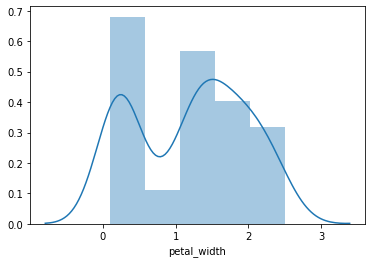

In [58]:
# distplot
# petal_width値に対するhistogramと確率密度関数
sns.distplot(df.petal_width)

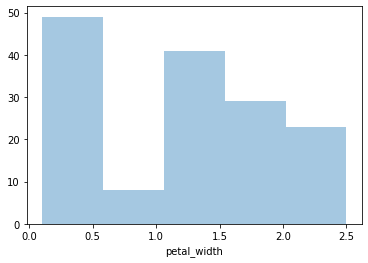

In [62]:
# 確率密度関数除いてhistogramだけ視覚化
# kde = False
sns.distplot(df.petal_width, kde=False)

In [63]:
df[df['species']=='setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


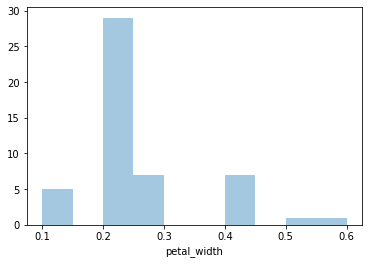

In [64]:
sns.distplot(df[df['species']=='setosa'].petal_width, kde=False)

# subplots in Seaborn

- ns.distplot(..., ax=axes[m,n])
    - axesのオブジェクトを生成してsubplotを使う方式
- plt.subplot(r,c,i)
    - subplotを単独生成して使う方式

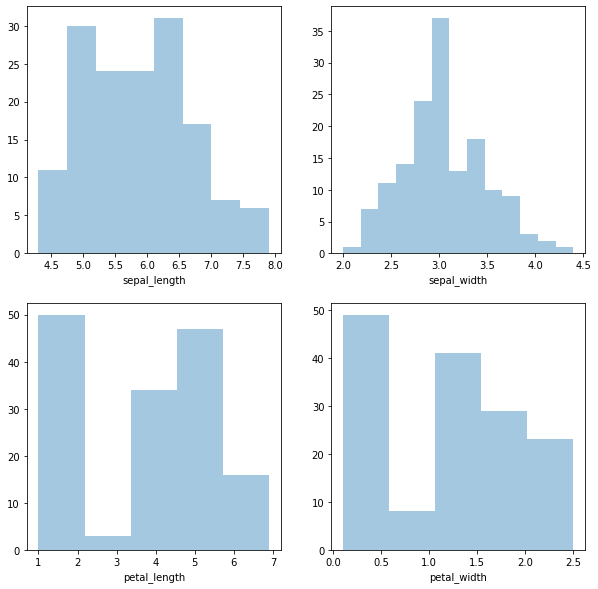

In [65]:
# subplotを単独で生成して、各属性別のdistplotを描く。
# 2 x 2
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.distplot(df.sepal_length, kde=False)

plt.subplot(2, 2, 2)
sns.distplot(df.sepal_width, kde=False)

plt.subplot(2, 2, 3)
sns.distplot(df.petal_length, kde=False)

plt.subplot(2, 2, 4)
sns.distplot(df.petal_width, kde=False)

In [67]:
tmp = df.species.value_counts()
tmp

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

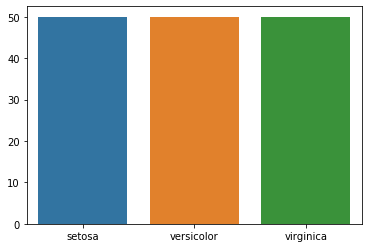

In [68]:
sns.barplot(x=tmp.index, y=tmp.values)

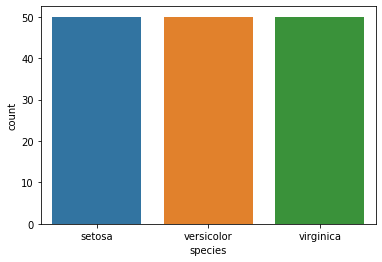

In [69]:
sns.countplot(x='species', data=df)

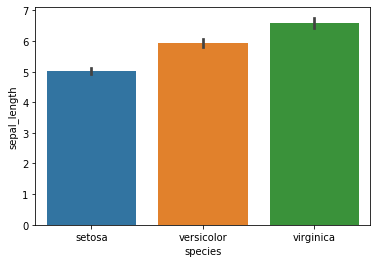

In [70]:
# bar plot
# 品種別にSepal_lengthを比較
sns.barplot(x='species', y='sepal_length', data=df)

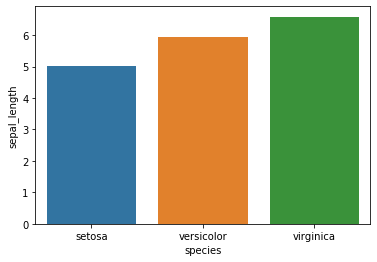

In [71]:
# error barがなく棒のグラフだけを表現 : ci=None
sns.barplot(x='species', y='sepal_length', data=df, ci=None)

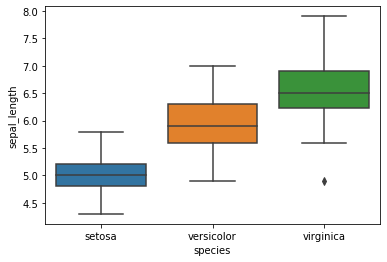

In [72]:
# sepal_length属性に対して品種別box-plot
sns.boxplot(x='species', y='sepal_length', data=df)

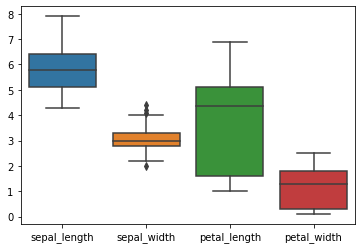

In [76]:
sns.boxplot(data=df.drop('species', axis=1))

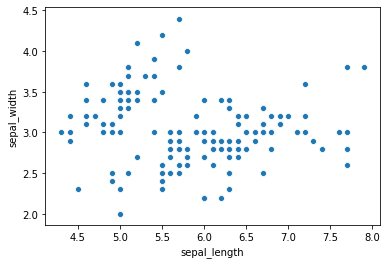

In [77]:
# scatter plot
# sepal_length, sepal_widthの分布を通じて相関関係を確認
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)

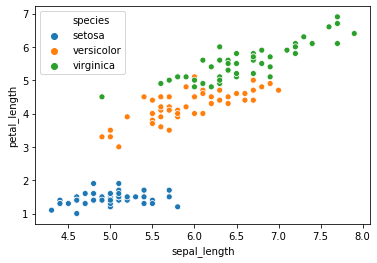

In [78]:
# 品種別区分を追加
# seabornで使うコマンド「hue」は入れたコラムのunique()を土台に値が何かによってマーカー色の区分をする。
sns.scatterplot(x='sepal_length', y='petal_length', data=df, hue='species')

In [80]:
sns.set_style('darkgrid')

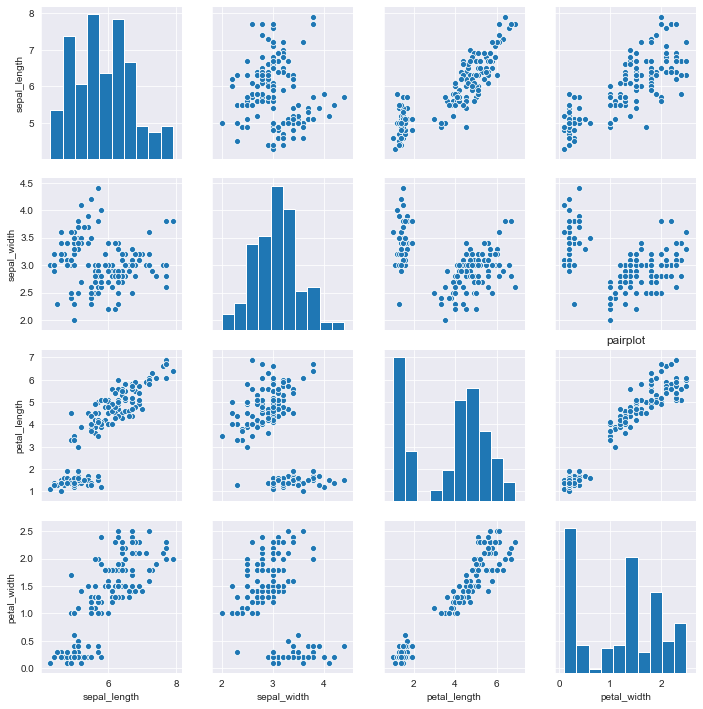

In [81]:
# pairplot : scatter matrix
sns.pairplot(df)
plt.title('pairplot')
plt.show()

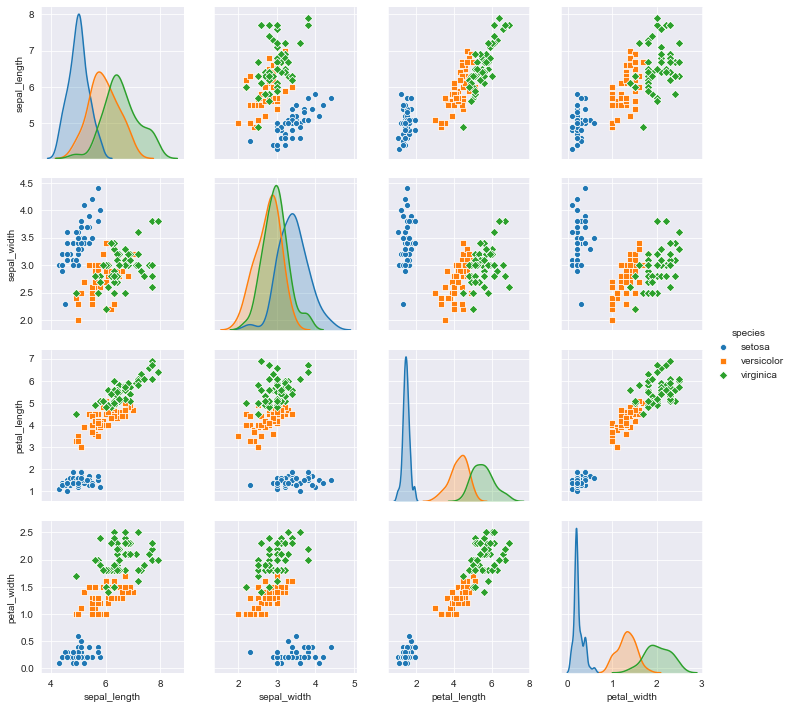

In [82]:
# hueパラメータで品種別の色やマーカーの模様を区分 : hue=品種の色,markers=マーカーの模様
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])

In [83]:
# DataFrame名.corr() : 各数値型変数間の相関を係数で表現する。 NaNは考慮しない。
# 相関係数とは、一つの要素が増加したり減少したりするときに他の要素が伴って増加したり減少したりする傾向があるのかを数値的に表現した係数である。
# 範囲は-1(完全逆比例)<=相関係数<=1(完全な正比例)
# 概ね0.3未満なら意味を持たない、0.5程度の中間、0.7以上なら高い。
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


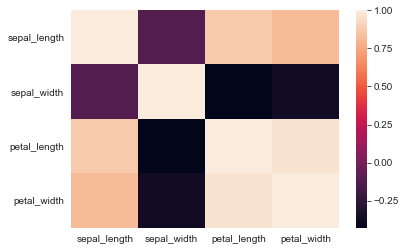

In [85]:
# heatmapを用いた相関係数の視覚化 : seaborn.heatmap(DataFrame名.corr())
sns.heatmap(df.corr())

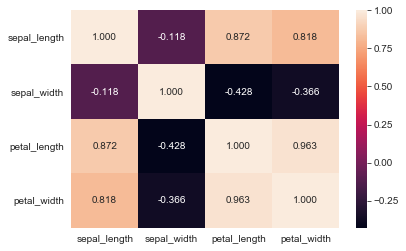

In [86]:
# annotがTrueの場合、相関図の数値をHeatmapに直接表示
sns.heatmap(df.corr(), annot=True, fmt='.3f')